In [1]:
# import nedded libraries
import pandas as pd
import numpy as np
#Data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [61]:
# data describtion
df = pd.read_csv('Advertising.csv')
del df['Unnamed: 0']
display(df.head())
display(df.info())
display(df.describe())
display(df.columns)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


None

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Index([u'TV', u'radio', u'newspaper', u'sales'], dtype='object')

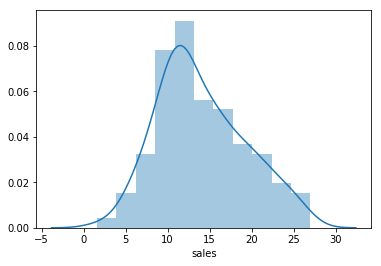

In [62]:
# data analysis 
# check price variable distribution
sns.distplot(USAhousing['sales'])

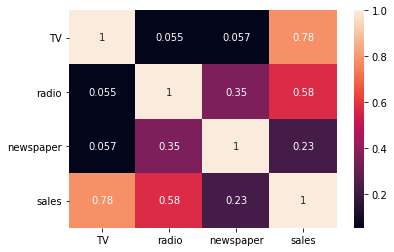

In [63]:
# plot correlation matrix to show relations between features
sns.heatmap(df.corr(),annot=True)

In [64]:
X = df[['TV','radio','newspaper']]
y = USAhousing['sales']

In [65]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [66]:
# model training
lm = LinearRegression()
train_sizes, train_scores, test_scores = learning_curve(estimator=lm,
                                                        X=X_train,
                                                        y=y_train,
                                                       scoring = 'neg_mean_squared_error',
                                                       cv=3)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
# model evaluation
predictions = lm.predict(X_test)
error=np.sqrt(mean_squared_error(y_test,predictions)) # rmse
print("RMSE : ",error)

('RMSE : ', 1.4521047337632071)


In [80]:
# print model coeffiecents 
print("intercept : ",lm.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[idx]))

('intercept : ', 2.961727496662869)
The coefficient for TV is 0.0449531826324
The coefficient for radio is 0.190164711251
The coefficient for newspaper is 0.00027399834965


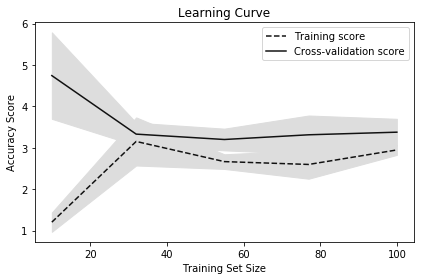

In [69]:
# plotting learning curve
# Create means and standard deviations of training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()